# ***** Bank - Credit Risk 

In order to ensure a structured and effective approach, this study will be guided by the principles of the CRISP-DM methodology. This framework will guide the project through key phases, such as understanding the business context, data exploration, data preparation, model building, and evaluation, ensuring that each step aligns with both technical objectives and business needs.

<br>

## Work Flow:

1.  Business Understanding;

2.  Initialization;

3.  Reading Files;

4.  Data Understanding;

5.  Preprocessing;

6. Exploratory Data Analysis (EDA);

7. Machine Learning Preprocessing;

8. Model Evaluation and Comparison;

9. Model Selection;

10. Performance Analysis;

11. Confidence Interval;

12. Final Conclusion.

<br>

## 1.0 Business Understanding



In a data science project focused on credit risk, the goal is to predict the probability of customer default, helping financial institutions make more informed decisions when granting credit.

By using historical data, such as demographic information, credit history, and income, it is possible to build predictive models based on supervised learning techniques. These models classify customers as good or bad payers, enabling more effective risk management.

For this, the data undergo cleaning and transformation processes before applying algorithms such as Logistic Regression, Decision Trees, Random Forest, XGBoost, LightGBM and Neural Networks.

The model’s performance is evaluated through metrics such as AUC-ROC and F1-score, ensuring that predictions are consistent and reliable over time.

Once the model is deployed, it must be continuously monitored to ensure that the predictions remain accurate over time.

<br>

## 2.0 Initialization

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import math
import warnings
from scipy import stats as st
from sklearn.utils import resample  # Add this import for resample function

# Settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
sns.set_theme(style="whitegrid")

# Metrics and model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, r2_score, roc_auc_score,average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Other utilities
from IPython.display import display
from numpy.linalg import LinAlgError
from joblib import dump
import shap
import optuna

<br>

## 3.0 Reading Files

In [2]:
df_credit_risk = pd.read_csv('credit_risk_data.csv')

In [3]:
df_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.00,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.00,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.00,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.00,PERSONAL,B,15000,11.48,0,0.10,N,26


-   person_age:	Age
-   person_income:	Annual Income
-   person_home_ownership:	Home ownership
-   person_emp_length:	Employment length (in years)
-   loan_intent:	Loan intent
-   loan_grade:	Loan grade
-   loan_amnt:	Loan amount
-   loan_int_rate:	Interest rate
-   loan_status:	Loan status (0 is non default 1 is default)
-   loan_percent_income:	Percent income
-   cb_person_default_on_file:	Historical default
-   cb_preson_cred_hist_length:	Credit history length



In [4]:
df_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


For the preprocessing phase, the following data type adjustments should be made:

-   person_home_ownership, loan_intent, and loan_grade should be treated as categorical variables.
-   cb_person_default_on_file should be transformed into a binary variable, with values 1 and 0.

<br>

## 4.0 Data Understanding

In [5]:
from functions import analyze_dataframe as analyzer

In [6]:
analyzer.analyze_dataframe(df_credit_risk, exclude_columns=None)


--- Categorical Columns Value Counts (with Percentages) ---

person_home_ownership (Top 10 of 4 total values):
                       Count Percentage
person_home_ownership                  
RENT                   16446     50.48%
MORTGAGE               13444     41.26%
OWN                     2584      7.93%
OTHER                    107      0.33%

loan_intent (Top 10 of 6 total values):
                   Count Percentage
loan_intent                        
EDUCATION           6453     19.81%
MEDICAL             6071     18.63%
VENTURE             5719     17.55%
PERSONAL            5521     16.95%
DEBTCONSOLIDATION   5212     16.00%
HOMEIMPROVEMENT     3605     11.06%

loan_grade (Top 10 of 7 total values):
            Count Percentage
loan_grade                  
A           10777     33.08%
B           10451     32.08%
C            6458     19.82%
D            3626     11.13%
E             964      2.96%
F             241      0.74%
G              64      0.20%

cb_person_default

#### Observations on the data:

1. Residential Ownership Distribution:\
Most clients are renters, which may indicate a profile of lower financial stability.

2. Loan Purpose:\
A significant portion of the loans is for education, medical expenses, and investments in new businesses (venture).
These purposes may have implications on the client's ability to repay, as some may represent higher risk.

3. Default History:\
About 17.63% of clients have a history of default, which can be an important indicator for predicting credit risk.

4. Presence of Outliers:\
Columns like person_age, person_income, and person_emp_length have clearly anomalous values (outliers). These need to be addressed to ensure they don't negatively impact the model's performance.

5. Proportion of Defaults:\
With 21.8% of clients in default, the dataset shows a certain class imbalance, which may require techniques like SMOTE or class weight adjustments in the model to address this.

6. Interest Rates and Income Percentage:\
The average interest rate is 11%, but some clients are paying up to 23.22%, which can represent a higher risk of default. Additionally, some clients have loans that account for up to 83% of their annual income, which is a major risk factor.

<br>

## 5.0 Data preprocessing

In [7]:
from functions import convert_to_category as category_converter
from functions import format_column_names_and_data as formatter
from functions import check_duplicates_and_missing_values as checker
from functions import remove_outliers_iqr as outliers

#### 5.1 Data Type Adjustments

In [8]:
df_credit_risk.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3


In [9]:
df_credit_risk = category_converter.convert_to_category(df_credit_risk, exclude_columns='cb_person_default_on_file')

In [10]:
df_credit_risk['cb_person_default_on_file'] = df_credit_risk['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [11]:
df_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  int64   
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(3), float64(3), int64(6)
memory usage: 2.3 MB


<br>

#### 5.2 Column and Data Formatting

In [12]:
df_credit_risk = formatter.format_column_names_and_data(df_credit_risk)

In [13]:
df_credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,rent,123.00,personal,d,35000,16.02,1,0.59,1,3
1,21,9600,own,5.00,education,b,1000,11.14,0,0.10,0,2
2,25,9600,mortgage,1.00,medical,c,5500,12.87,1,0.57,0,3
3,23,65500,rent,4.00,medical,c,35000,15.23,1,0.53,0,2
4,24,54400,rent,8.00,medical,c,35000,14.27,1,0.55,1,4


<br>

#### 5.4 Handling Duplicates and Missing Values

In [14]:
checker.check_duplicates_and_missing_values(df_credit_risk, target_column='loan_status')

Class balance in the target column 'loan_status':
             Count Percentage
loan_status                  
0            25473     78.18%
1             7108     21.82%


Total number of duplicate rows: 165
Percentage of duplicate rows: 0.51%

Number of duplicate rows by target column 'loan_status':
loan_status
0    146
1     19
Name: count, dtype: int64

Missing values per column and percentage:
                   Missing Values Percentage
person_emp_length             895      2.75%
loan_int_rate                3116      9.56%

Missing values percentages per 'loan_status':

For loan_status = 1:
                   Missing Values Percentage
person_emp_length             282     31.51%
loan_int_rate                 644     20.67%

For loan_status = 0:
                   Missing Values Percentage
person_emp_length             613     68.49%
loan_int_rate                2472     79.33%
No columns with 100% missing values.


Total rows with missing values: 3943
Percentage of rows with mis

In a credit risk model designed to predict the probability of default before the loan is granted, the loan_int_rate (interest rate) variable should not be used in the training process. This is because the interest rate has not yet been determined at the time the credit is being evaluated. Including this variable could lead to data leakage, as the model would be using information that is not available at the time of the decision. In this case, the model would be accessing data that is essentially a consequence of the risk analysis process itself, compromising the validity of the predictions. Therefore, to ensure the integrity of the model and avoid biases, the loan_int_rate column should be excluded from the training.

For this reason, only the missing values in the person_emp_length column will be handled, and after this treatment, a new DataFrame will be generated without the loan_int_rate column, ensuring the model’s integrity.

In [15]:
df_credit_risk = df_credit_risk.dropna(subset=['person_emp_length'])

In [16]:
df = df_credit_risk.drop(columns=['loan_int_rate'])

In [17]:
df = df.drop_duplicates()

In [18]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,rent,123.00,personal,d,35000,1,0.59,1,3
1,21,9600,own,5.00,education,b,1000,0,0.10,0,2
2,25,9600,mortgage,1.00,medical,c,5500,1,0.57,0,3
3,23,65500,rent,4.00,medical,c,35000,1,0.53,0,2
4,24,54400,rent,8.00,medical,c,35000,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,mortgage,1.00,personal,c,5800,0,0.11,0,30
32577,54,120000,mortgage,4.00,personal,a,17625,0,0.15,0,19
32578,65,76000,rent,3.00,homeimprovement,b,35000,1,0.46,0,28
32579,56,150000,mortgage,5.00,personal,b,15000,0,0.10,0,26


<br>

#### 5.5 Handling Outliers

"Columns like person_age, person_income, and person_emp_length have clearly anomalous values (outliers)."

In [19]:
from functions import boxplot_numeric_columns as boxplot

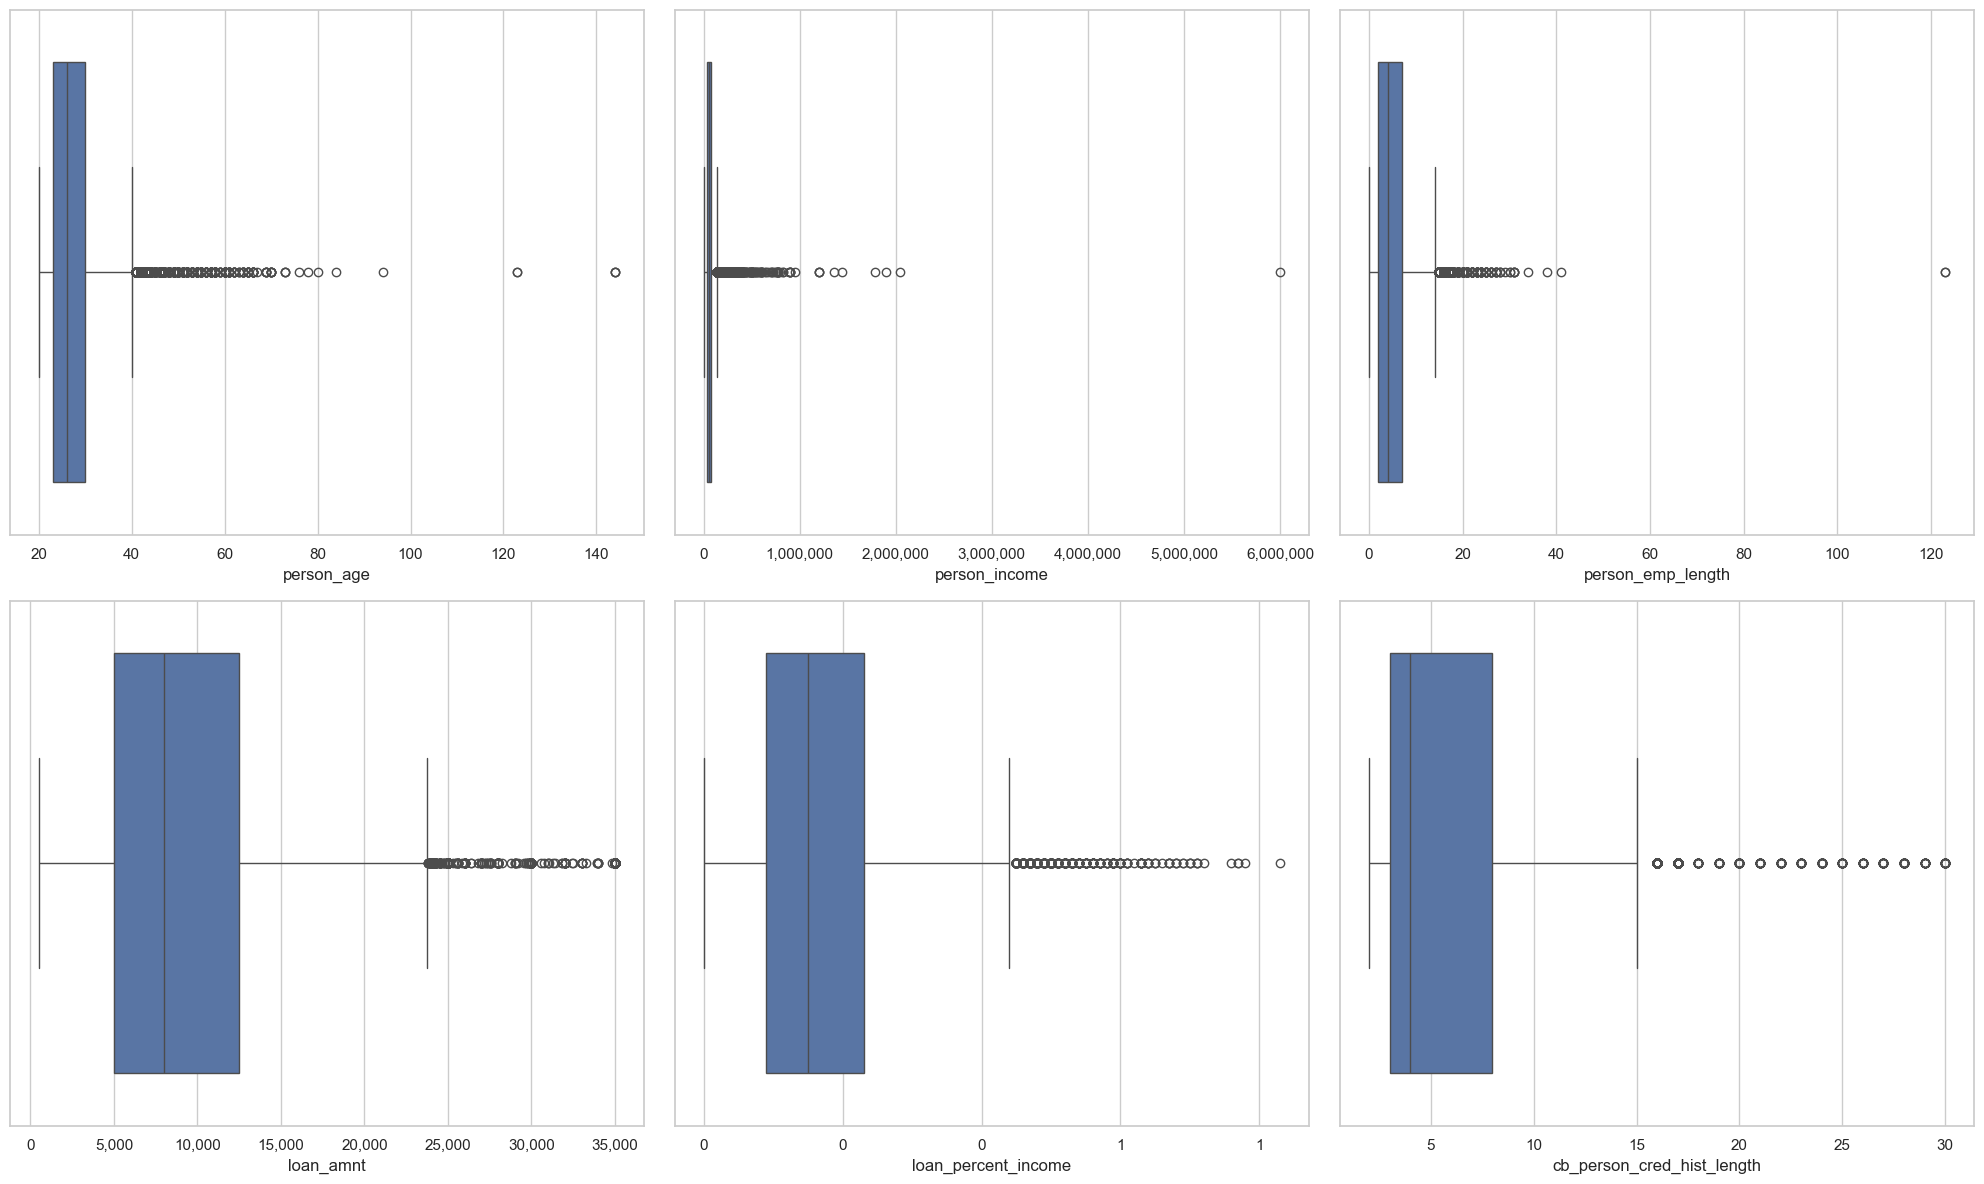

In [20]:
boxplot.boxplot_numeric_columns(df,exclude_columns=['loan_status', 'cb_person_default_on_file'])

In [21]:
df = df[df['person_age'] <= 74]

The age limit of 74 years has been set to ensure that applicants fall within the acceptable range for credit eligibility, as many financial institutions impose a maximum age of 75 years for granting credit. This limitation is often in place to minimize risk and align with typical retirement ages, as older applicants may have reduced income stability. By setting the limit at 74 years, it ensures that the borrower remains within the lending guidelines during the loan term, providing a buffer for loan approval processes that may extend over several months.

<br>

In [22]:
df = df[df['person_emp_length'] <= 60]

The limit of 60 months for person_emp_length has been set to reflect the typical maximum loan term for the credit lines in question. Many financial institutions cap their loan terms at 60 months to mitigate long-term risk and ensure that borrowers maintain employment stability throughout the loan period. This limit helps in aligning the lending process with the duration over which borrowers are most likely to sustain steady income, ensuring that they can meet their financial obligations. By capping the employment length at 60 months, it also provides a standardized approach for evaluating applicants, focusing on those whose employment status fits within the lending guidelines.

<br>

In [23]:
df['person_income'].describe()

count     31507.00
mean      66505.45
std       52761.60
min        4000.00
25%       39426.00
50%       56000.00
75%       80000.00
max     2039784.00
Name: person_income, dtype: float64

In [24]:
df['person_income'].quantile(0.99)

227500.0

In [25]:
df = df[df['person_income'] <= 300000]

The income limit of 300,000 was set to exclude outliers and ensure that the dataset focuses on the majority of clients who fall within a realistic income range. This value corresponds to an amount above the 99th percentile of the client portfolio, meaning that less than 1% of individuals with extremely high incomes are being filtered out. By establishing this limit, we ensure that the analysis and model training are based on a representative sample of typical borrowers, avoiding skewed results caused by extreme income values that may not reflect the general credit behavior of the population.

<br>

#### 5.6 Feature Engineering

The create_age_groups function aims to create a new column called age_group in a DataFrame, categorizing clients into age groups: Young (18-25), Adults (26-45), and Seniors (46+). This classification is based on the existing person_age column and can be useful for credit risk analysis, allowing the identification of potential risk patterns across different age ranges

In [26]:
def create_age_groups(df):
    """
    Function to create age groups categorized as 'Young', 'Adults', and 'Seniors' 
    based on the client's age.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the 'person_age' column.
    
    Returns:
    pd.DataFrame: DataFrame with a new column 'age_group' added right after the 'person_age' column.
    """
    # Define the age groups
    bins = [18, 25, 45, float('inf')]  # Age limits: 18-25, 26-45, 46+
    labels = ['young', 'adults', 'seniors']  # Group labels
    
    # Create the new 'age_group' column based on the 'person_age' column
    df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)
    
    # Reorder columns to insert 'age_group' right after 'person_age'
    age_group_col = df.pop('age_group')  # Temporarily remove the 'age_group' column
    df.insert(df.columns.get_loc('person_age') + 1, 'age_group', age_group_col)  # Insert after 'person_age'
    
    return df

# Example usage with your DataFrame:
df = create_age_groups(df)

# Display the DataFrame with the new age group column
print(df[['person_age', 'age_group']].sample(5))


       person_age age_group
11763          26    adults
2671           23     young
26090          30    adults
20121          29    adults
23526          29    adults


<br>


The create_financial_commitment_level function aims to create a new categorical column called financial_commitment_level, based on the loan_percent_income column, which indicates the percentage of income committed to the loan. The function classifies clients into three categories: Low Risk, Medium Risk, and High Risk, according to predefined thresholds.

In [27]:
def create_financial_commitment_level(df):
    """
    Function to create a new categorical column 'financial_commitment_level' based on the 'loan_percent_income' column.
    Classifies clients into 'Low Risk', 'Medium Risk', and 'High Risk' based on the provided ranges.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the 'loan_percent_income' column.
    
    Returns:
    pd.DataFrame: DataFrame with a new 'financial_commitment_level' column added right after 'loan_percent_income'.
    """
    # Define the ranges and category labels
    bins = [0, 0.3, 0.6, float('inf')]  # Ranges: <0.3, 0.3-0.6, >0.6
    labels = ['low_risk', 'medium_risk', 'high_risk']  # Labels for each range
    
    # Create the new 'financial_commitment_level' column based on 'loan_percent_income'
    df['financial_commitment_level'] = pd.cut(df['loan_percent_income'], bins=bins, labels=labels, right=False)
    
    # Reorder the columns to insert 'financial_commitment_level' right after 'loan_percent_income'
    commitment_level_col = df.pop('financial_commitment_level')  # Temporarily remove the new column
    df.insert(df.columns.get_loc('loan_percent_income') + 1, 'financial_commitment_level', commitment_level_col)  # Insert after 'loan_percent_income'
    
    return df

# Example usage with your DataFrame:
df = create_financial_commitment_level(df)

# Display the DataFrame with the new financial commitment level column
print(df[['loan_percent_income', 'financial_commitment_level']].sample(5))


       loan_percent_income financial_commitment_level
22525                 0.12                   low_risk
9805                  0.27                   low_risk
24710                 0.27                   low_risk
2806                  0.06                   low_risk
16543                 0.22                   low_risk


<br>

The create_stable_emp_column function aims to create a new column called stable_emp, which indicates whether the client has a stable job, defined as 2 or more years of employment. The column is created based on the person_emp_length values, where 1 represents job stability (2 or more years) and 0 indicates less than 2 years of employment.

In [28]:
def create_stable_emp_column(df):
    """
    Function to create a new 'stable_emp' column based on the 'person_emp_length' column.
    The column indicates whether the client has a stable job (2 or more years).
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the 'person_emp_length' column.
    
    Returns:
    pd.DataFrame: DataFrame with the new 'stable_emp' column added right after 'person_emp_length'.
    """
    # Create the new 'stable_emp' column based on the condition of 2 or more years of employment
    df['stable_emp'] = df['person_emp_length'].apply(lambda x: 1 if x >= 2 else 0)
    
    # Reorder the columns to insert 'stable_emp' right after 'person_emp_length'
    stable_emp_col = df.pop('stable_emp')  # Temporarily remove the new column
    df.insert(df.columns.get_loc('person_emp_length') + 1, 'stable_emp', stable_emp_col)  # Insert after 'person_emp_length'
    
    return df

# Example usage with your DataFrame:
df = create_stable_emp_column(df)

# Display the DataFrame with the new 'stable_emp' column
print(df[['person_emp_length', 'stable_emp']].sample(5))


       person_emp_length  stable_emp
3147                2.00           1
4167                5.00           1
19727              16.00           1
21470               2.00           1
4073                2.00           1


<br>

## 6.0 Exploratory Data analyses (EDA)

In [29]:
from functions import boxplot_numeric_columns as boxplot
from functions import kde_numeric_columns as kde
from functions import barplot_categorical_columns as barplot

In [30]:
df.head()

,person_age,age_group,person_income,person_home_ownership,person_emp_length,stable_emp,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,financial_commitment_level,cb_person_default_on_file,cb_person_cred_hist_length
1,21,young,9600,own,5.00,1,education,b,1000,0,0.10,low_risk,0,2
2,25,adults,9600,mortgage,1.00,0,medical,c,5500,1,0.57,medium_risk,0,3
3,23,young,65500,rent,4.00,1,medical,c,35000,1,0.53,medium_risk,0,2
4,24,young,54400,rent,8.00,1,medical,c,35000,1,0.55,medium_risk,1,4
5,21,young,9900,own,2.00,1,venture,a,2500,1,0.25,low_risk,0,2


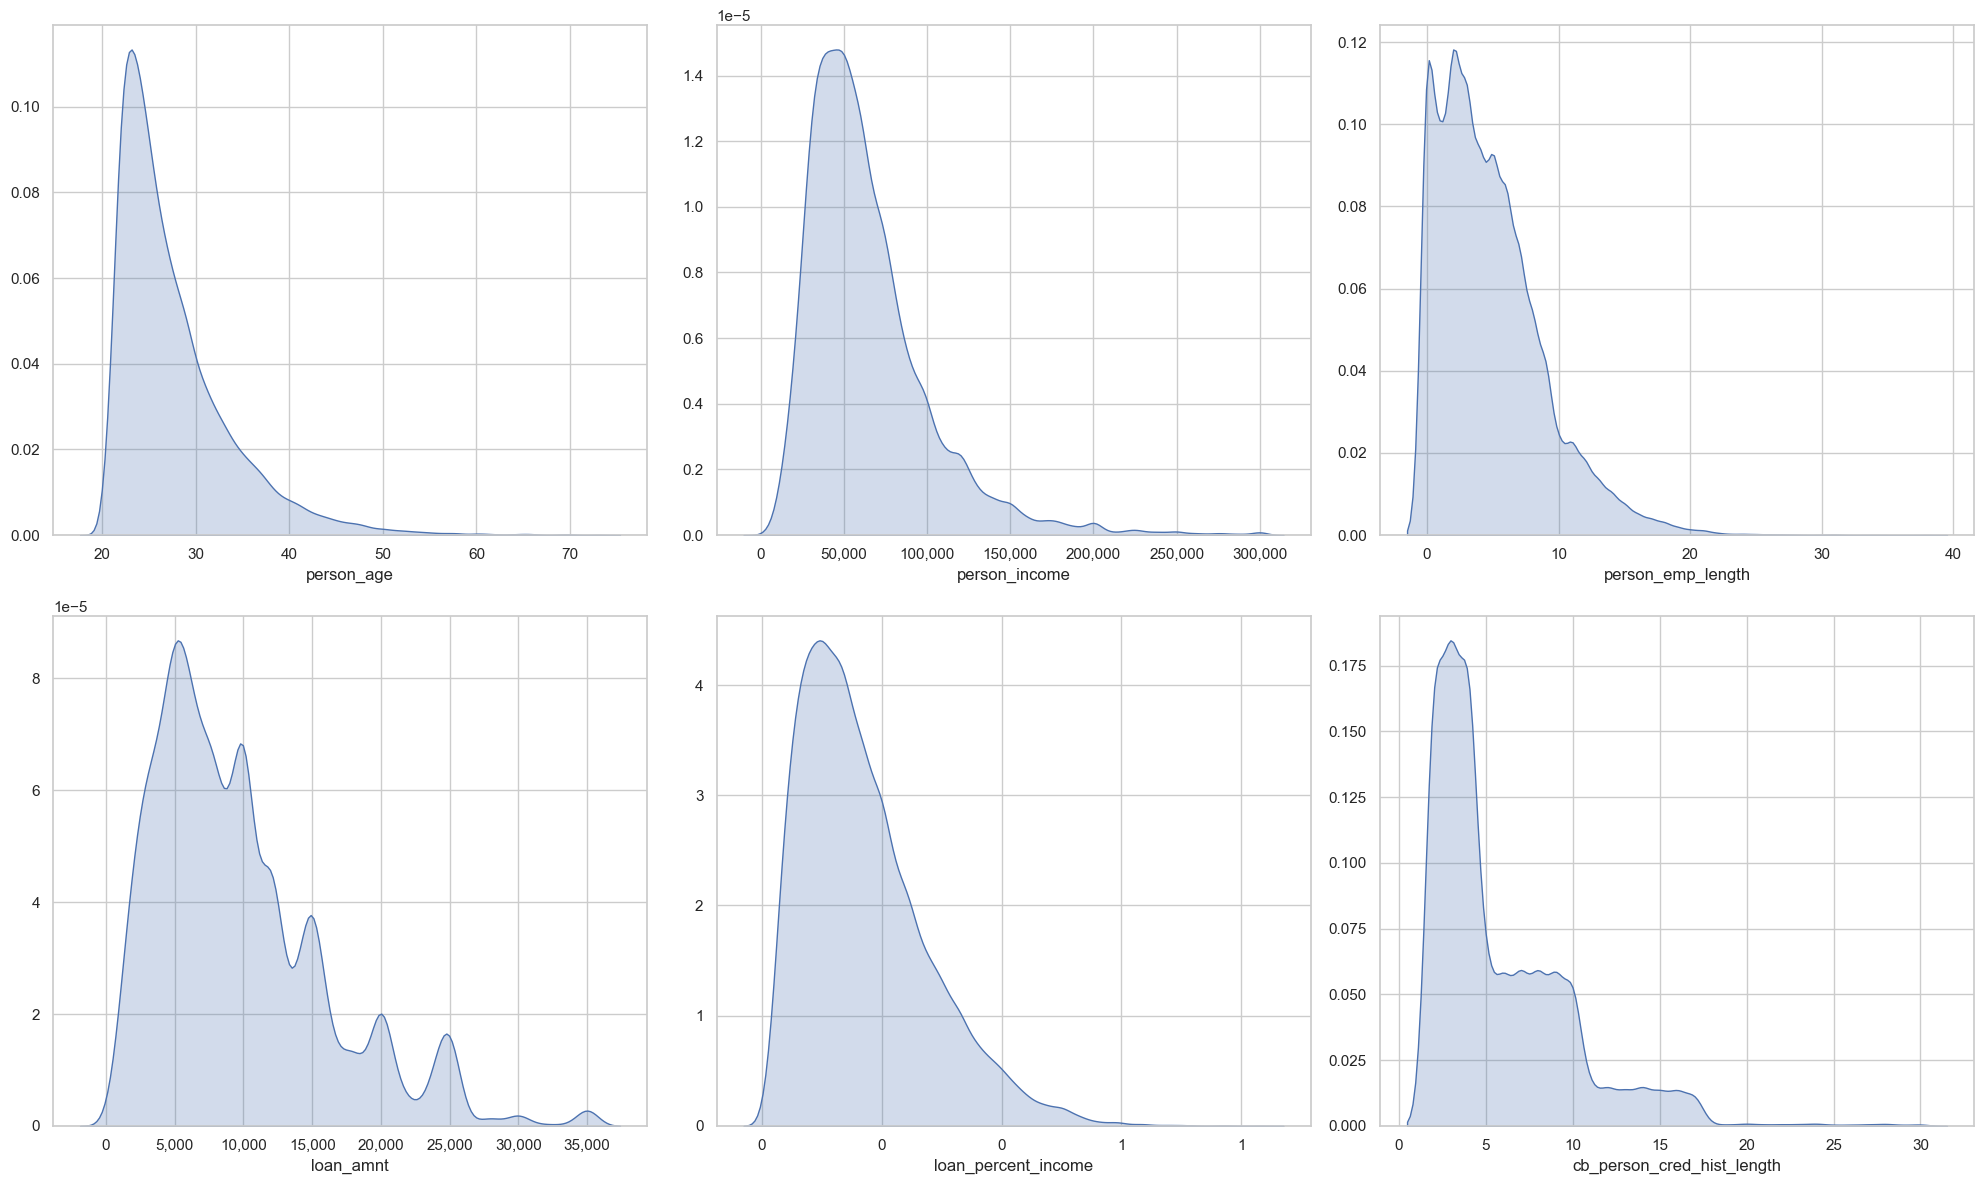

In [31]:
# Checking the distribution of numerical variables (excluding binary variables):

kde.kde_numeric_columns(df,exclude_columns=['loan_status', 'cb_person_default_on_file', 'stable_emp'])

#### Observations on the data:

-   Age Distribution (person_age): The majority of applicants are concentrated between 20 and 30 years old, with a sharp decline after 30. Few individuals are over 50 years old, indicating that most borrowers are young.

-   Income (person_income): The distribution is skewed, with most incomes ranging from 20,000 to 60,000 euros, and a gradual decrease as incomes rise. The upper limit is capped at 300,000 euros, with the majority of borrowers falling well below this threshold.

-   Employment Length (person_emp_length): Most applicants have between 0 and 10 years of work experience, with a slight concentration between 2 and 5 years. There are a few cases with significantly long employment lengths, though these are less common.

-   Loan Amount (loan_amnt): Most loans range between 5,000 and 15,000 euros, with few loans requested above 30,000 euros. The distribution shows some skewness, but this should be manageable within the model without needing transformations.

-   Loan Percent of Income (loan_percent_income): The majority of loans represent a small portion of the clients' income, generally below 0.4. This suggests that most loans do not significantly burden applicants' incomes.

-   Credit History Length (cb_person_cred_hist_length): The distribution shows a concentration of relatively short credit histories, between 2 and 6 years, indicating that many clients are relatively new to the financial system.

Conclusion: While some variables exhibit skewness, models like LightGBM should effectively handle this structure without the need for logarithmic transformations. The data structure is well-positioned to capture the key characteristics relevant to credit risk.

<br>

In [32]:
df.head(3)

,person_age,age_group,person_income,person_home_ownership,person_emp_length,stable_emp,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,financial_commitment_level,cb_person_default_on_file,cb_person_cred_hist_length
1,21,young,9600,own,5.00,1,education,b,1000,0,0.10,low_risk,0,2
2,25,adults,9600,mortgage,1.00,0,medical,c,5500,1,0.57,medium_risk,0,3
3,23,young,65500,rent,4.00,1,medical,c,35000,1,0.53,medium_risk,0,2


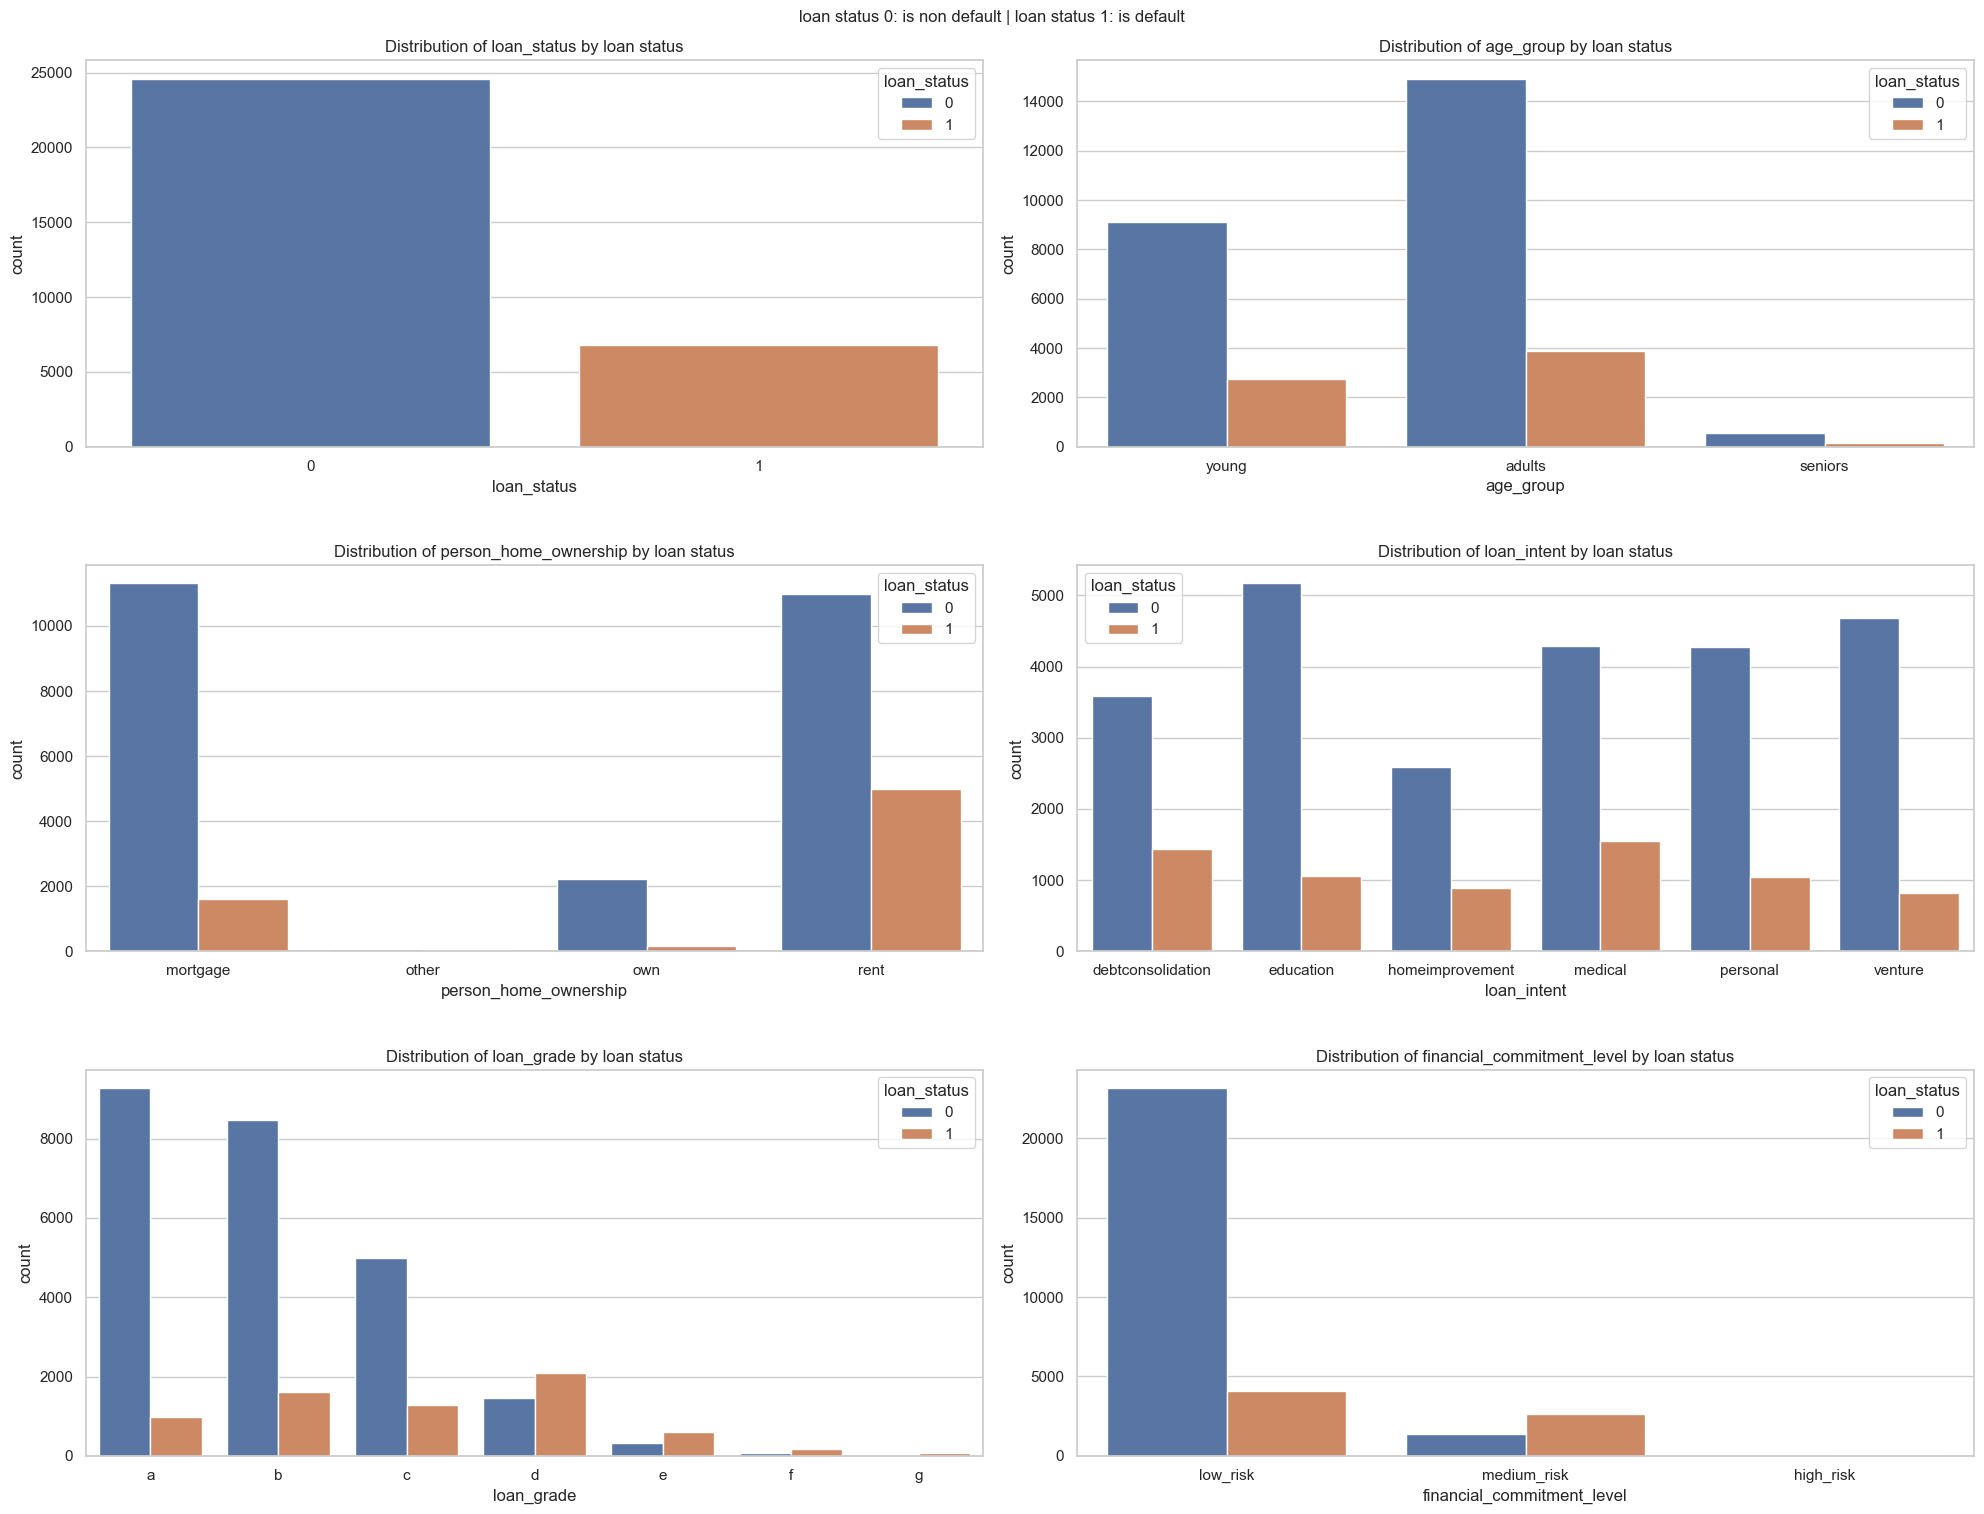

In [33]:
columns = ['loan_status', 'age_group', 'person_home_ownership', 'loan_intent', 'loan_grade', 'financial_commitment_level']
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols 
plt.figure(figsize=(20, n_rows * 5)) 
for i, column in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'Distribution of {column} by loan status')
    plt.tight_layout(h_pad=3)

plt.figtext(0.5, 1.0, "loan status 0: is non default | loan status 1: is default", ha="center", fontsize=12);

#### Observations on the data:

-   Loan Status: The vast majority of clients are not in default (78.18% non-default versus 21.82% default).

-   Age Group: Most defaulters fall in the "Adults" age group (26-45 years), while the "Seniors" (46+ years) group has the lowest default rate.

-   Home Ownership: Renters have a higher default rate compared to those with a mortgage or who own their homes.

-   Loan Intent: Default is more common for loans intended for "education" and "medical" purposes, suggesting these loan purposes may be associated with higher risk.

-   Credit Grade (loan_grade): Lower credit grades (C, D, E, F, G) have a higher proportion of defaults. In contrast, clients with A and B grades show lower default rates.

-   Financial Commitment Level: Clients with higher financial commitment (high-risk group) show a significantly higher default rate.

<br>

## 7.0 ML Preprocessing 

In [34]:
from functions import encode_columns as encoder

In [35]:
df.head(3)

,person_age,age_group,person_income,person_home_ownership,person_emp_length,stable_emp,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,financial_commitment_level,cb_person_default_on_file,cb_person_cred_hist_length
1,21,young,9600,own,5.00,1,education,b,1000,0,0.10,low_risk,0,2
2,25,adults,9600,mortgage,1.00,0,medical,c,5500,1,0.57,medium_risk,0,3
3,23,young,65500,rent,4.00,1,medical,c,35000,1,0.53,medium_risk,0,2


In [36]:
# Avoiding Data Leakage:

df_ml = df.drop(columns=['loan_grade'])

The "loan_grade" column was removed to avoid data leakage, as the model needs to be able to evaluate both customers with and without credit history. Since there is no assigned grade for customers without a history, keeping this variable could introduce bias and compromise the evaluation of new clients. By excluding this column, we ensure that the model makes predictions based on information that is consistently available for all customers, preventing the use of data that would not be known at the time of credit issuance.

In [37]:
# Enconding:

df_ml = encoder.encode_columns(df_ml, ohe_columns=['age_group', 'person_home_ownership', 'loan_intent', 'financial_commitment_level'], label_columns= None)

In [38]:
# Normalization:

numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = MinMaxScaler()

df_ml[numeric_columns] = scaler.fit_transform(df_ml[numeric_columns])

In [39]:
df_ml

,person_age,person_income,person_emp_length,stable_emp,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group_young,age_group_adults,age_group_seniors,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,person_home_ownership_rent,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture,financial_commitment_level_low_risk,financial_commitment_level_medium_risk,financial_commitment_level_high_risk
1,0.02,0.02,0.13,1,0.01,0,0.11,0,0.00,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
2,0.09,0.02,0.03,0,0.14,1,0.68,0,0.04,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
3,0.06,0.21,0.11,1,1.00,1,0.63,0,0.00,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,0.08,0.17,0.21,1,1.00,1,0.66,1,0.07,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
5,0.02,0.02,0.05,1,0.06,1,0.29,0,0.00,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.70,0.17,0.03,0,0.15,0,0.12,0,1.00,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False
32577,0.64,0.39,0.11,1,0.50,0,0.17,0,0.61,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False
32578,0.85,0.24,0.08,1,1.00,1,0.55,0,0.93,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False
32579,0.68,0.49,0.13,1,0.42,0,0.11,0,0.86,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False


In [40]:
# Splitting data (70/15/15):

X = df_ml.drop(columns=['loan_status'])
y = df_ml['loan_status']

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.30, random_state=54321)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=54321)

In [41]:
# Class balancing

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [42]:
num_negatives = len(y_train[y_train == 0])  # Contar o número de exemplos da classe negativa
num_positives = len(y_train[y_train == 1])  # Contar o número de exemplos da classe positiva
a =  num_negatives / num_positives
a

3.5857172687408645

<br>

## 8.0 Model Evaluation and Comparison

In [43]:
from functions import evaluate_multiple_classification_models as multiple_evaluater

In [44]:

multiple_evaluater.evaluate_multiple_classification_models(X_train_smote, y_train_smote, X_val, y_val)



### Dummy ###
          train  val
Accuracy   0.50 0.79
F1 Score   0.00 0.00
APS        0.50 0.21
ROC AUC    0.50 0.50

### Logistic Regression ###
          train  val
Accuracy   0.74 0.76
F1 Score   0.73 0.55
APS        0.84 0.64
ROC AUC    0.82 0.82

### Random Forest ###
          train  val
Accuracy   1.00 0.87
F1 Score   1.00 0.66
APS        1.00 0.74
ROC AUC    1.00 0.85

### K-Nearest Neighbors ###
          train  val
Accuracy   0.89 0.74
F1 Score   0.90 0.52
APS        0.96 0.52
ROC AUC    0.97 0.78

### Support Vector Machine ###
          train  val
Accuracy   0.77 0.82
F1 Score   0.74 0.59
APS        0.87 0.69
ROC AUC    0.85 0.83

### LightGBM ###
          train  val
Accuracy   0.93 0.89
F1 Score   0.93 0.69
APS        0.98 0.79
ROC AUC    0.98 0.89

### XGBoost ###
          train  val
Accuracy   0.95 0.89
F1 Score   0.95 0.70
APS        0.99 0.80
ROC AUC    0.99 0.90

### CatBoost ###
          train  val
Accuracy   0.94 0.90
F1 Score   0.94 0.70
APS        0.99 0.81



The performance analysis of the trained models reveals a variety of behaviors, with some exhibiting significant overfitting issues while others show a good ability to generalize.

Some models, such as Logistic Regression and Support Vector Machine (SVM), demonstrated reasonable performance in both training and validation, with consistent results, though less impressive compared to more advanced models.

The best performances were observed in the gradient boosting models, with XGBoost standing out as the model chosen for this task. It achieved a ROC AUC of 0.90 on the validation set.

However, it is important to note that the ROC AUC of 0.99 on the training data indicates overfitting. The model may be excessively tuned to the training set, potentially compromising its ability to generalize to new data, despite its strong validation performance.

<br>

## 9.0 Chosen Model (XGBoost)

In [45]:
from functions import evaluate_classification_model as evaluater

I chose to use the unbalanced data in the XGBoost model because it has hyperparameters, such as scale_pos_weight, that effectively handle class imbalance. By properly tuning these hyperparameters, XGBoost can assign the correct weight to the minority classes, avoiding the need for balancing techniques like SMOTE and preserving the integrity of the original data for better generalization.

  0%|          | 0/100 [00:00<?, ?it/s]

Best hyperparameters found:
{'learning_rate': 0.019961881093933605, 'n_estimators': 288, 'max_depth': 28, 'min_child_weight': 13, 'subsample': 0.7651575519866148, 'colsample_bytree': 0.7347442551996854, 'reg_alpha': 2.0384232566957223, 'reg_lambda': 6.500622409281938}
          train  val/test
Accuracy   0.90      0.88
F1 Score   0.75      0.70
APS        0.85      0.80
ROC AUC    0.92      0.89


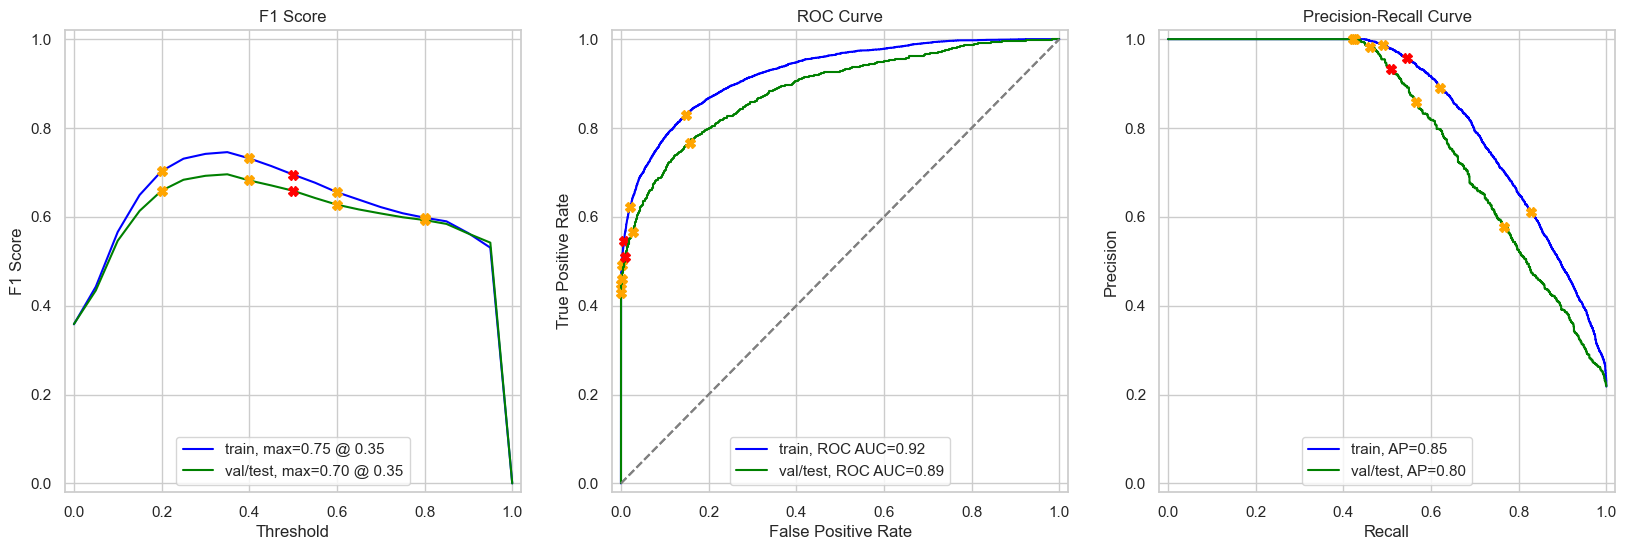

In [52]:
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):

    num_negatives = len(y_train[y_train == 0])  
    num_positives = len(y_train[y_train == 1])

    scale_pos_weight = num_negatives / num_positives

    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.02),  
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  
        'max_depth': trial.suggest_int('max_depth', 3, 50),  
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 50),  
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),  
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.8),  
        'reg_alpha': trial.suggest_float('reg_alpha', 1.0, 10.0),  
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 10.0),
        'scale_pos_weight': scale_pos_weight,  
        'random_state': 54321,
        'verbosity': 0,
        'use_label_encoder': False,
        'eval_metric': 'auc'  
    }
    
    xgb_model = XGBClassifier(**param)

    xgb_model.fit(
        X_train, y_train, 
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    y_pred = xgb_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

print("Best hyperparameters found:")
print(study.best_params)


best_xgb_model = XGBClassifier(**study.best_params, verbosity=0, use_label_encoder=False, eval_metric='auc')
best_xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)


y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)


evaluater.evaluate_classification_model(best_xgb_model, X_train, y_train, X_test, y_test)

After tuning the hyperparameters and deciding to use the unbalanced dataset, a significant improvement in the performance of the XGBoost model was observed, particularly in reducing the gap between the training and validation results. The Accuracy, F1 Score, APS, and ROC AUC for the validation data improved, with the ROC AUC reaching 0.89, close to what was seen in the training set. The target for the metrics has been met, and in future steps, we will validate the 95% confidence interval to ensure the robustness of the results.

<br>

## 10.0 Performance Analysis

#### 10.1 SHAP

SHAP will be used to analyze the predictions of the LightGBM model. This type of analysis is crucial for increasing the model's interpretability and identifying which features have the greatest impact on predictions, helping to improve the model or explain the results.

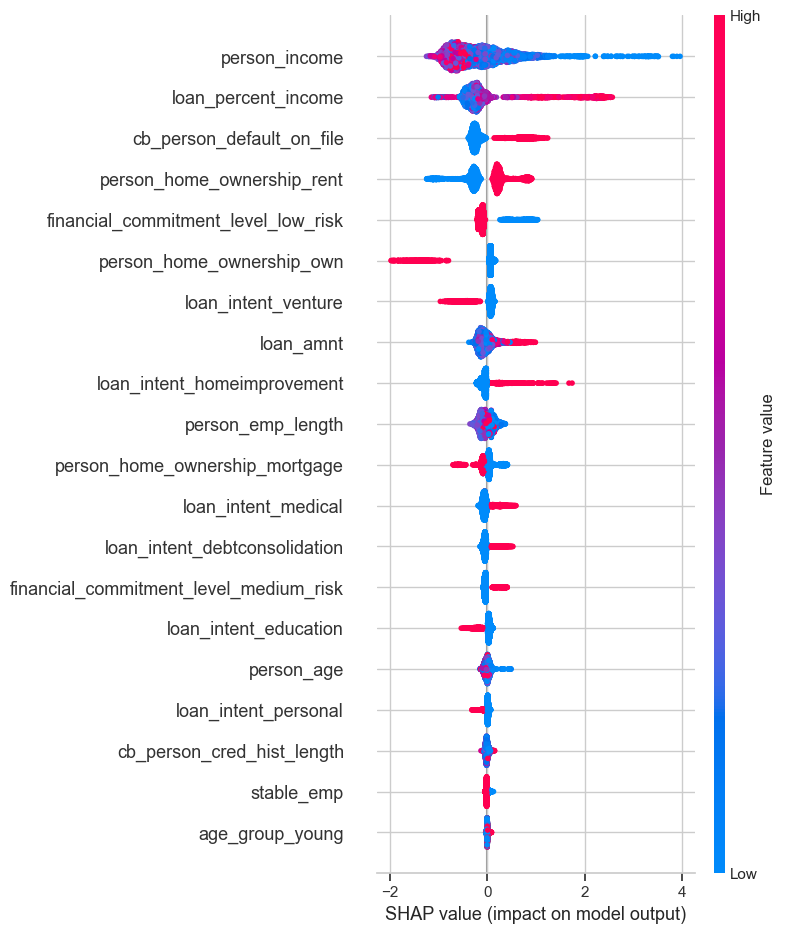

In [47]:
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

<br>

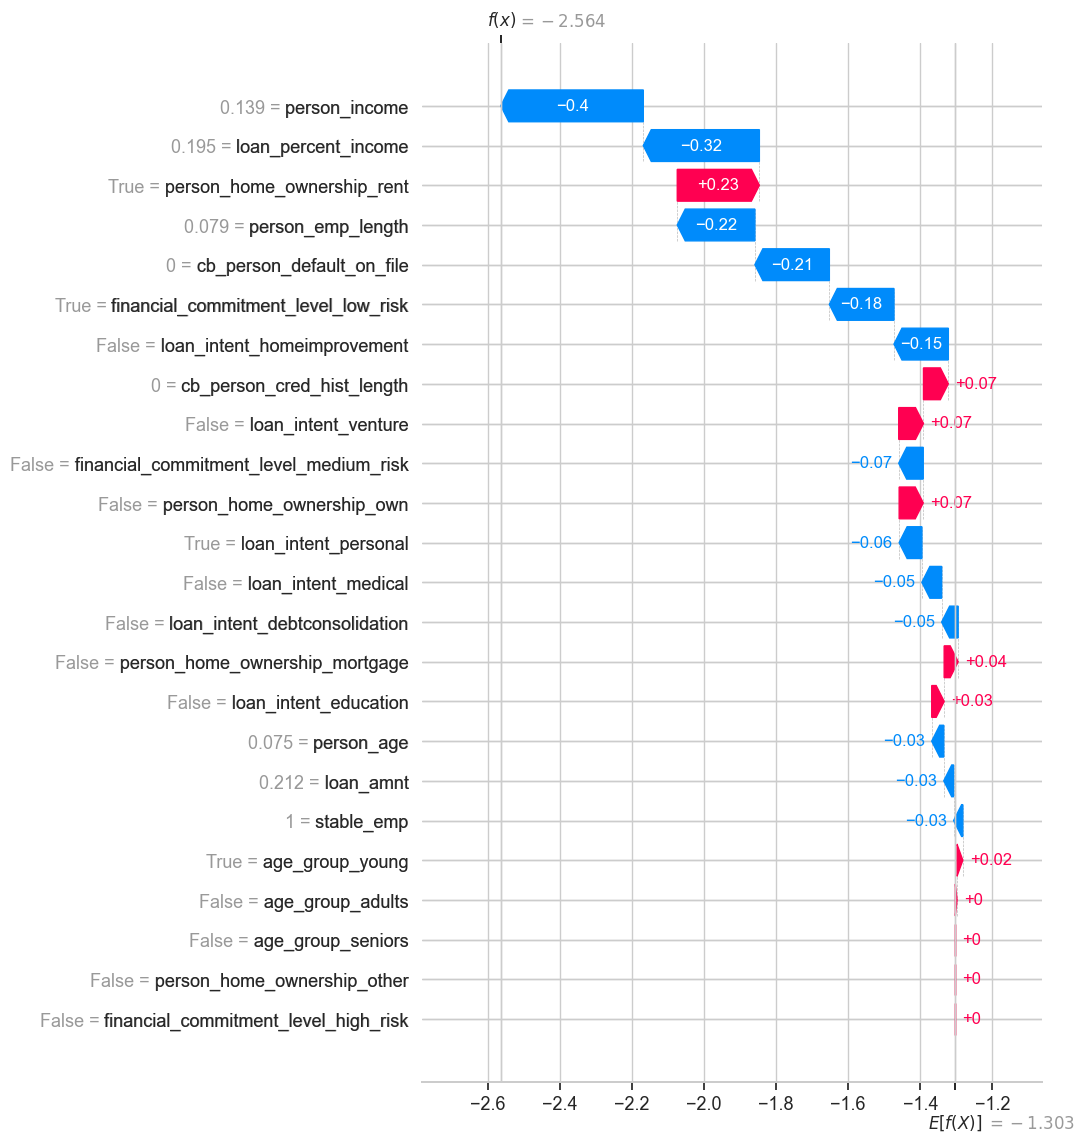

In [48]:
shap_values = explainer(X_test)  
shap.waterfall_plot(shap_values[0], max_display=len(X_test.columns)) 

<br>

#### 10.2 Error Analysis

In [49]:
from functions import error_report as reporter

In [50]:
reporter.error_report(X_test, y_test, y_pred_proba)


------ False Positives ------

Total False Positives: 29

Feature Means:
person_age                               0.16
person_income                            0.16
person_emp_length                        0.07
stable_emp                               0.76
loan_amnt                                0.30
loan_percent_income                      0.24
cb_person_default_on_file                0.90
cb_person_cred_hist_length               0.17
age_group_young                          0.41
age_group_adults                         0.55
age_group_seniors                        0.03
person_home_ownership_mortgage           0.21
person_home_ownership_other              0.00
person_home_ownership_own                0.00
person_home_ownership_rent               0.79
loan_intent_debtconsolidation            0.28
loan_intent_education                    0.03
loan_intent_homeimprovement              0.10
loan_intent_medical                      0.38
loan_intent_personal                     0.17
loan_i

In this report, I analyzed the variances of key features in errors (false positives and false negatives) as well as in successes (true positives and true negatives) to assess the model's consistency in interpreting these variables. Some features showed high variance in both errors and successes, raising the possibility of inconsistent interpretation by the model, which might require adjustments.

However, after reviewing the SHAP summary plot, I observed that these high-variance variables do not have a significant impact on predictions, leading me to conclude that they do not play a decisive role in the model’s behavior. Therefore, I do not believe that the model is making any interpretive errors with respect to these variables. The high variance is likely just a reflection of the nature of these features and does not affect overall performance.

This detailed analysis is crucial to ensure that the model is performing robustly. Despite the overall good performance, this report helps me monitor potential areas for improvement, even though, in this case, I conclude that no immediate corrections are needed for the variables analyzed.

<br>

## 11.0 Confidence Intervals

The confidence interval plays a crucial role in assessing the robustness of a machine learning model, as it provides an estimate of the variability in performance metrics such as accuracy, precision, and AUC-ROC. To efficiently calculate these intervals, the bootstrapping technique is widely used, allowing for multiple resamplings of the data and generating multiple estimates. This process is essential to ensure that the model not only performs well on the specific training and test datasets but also delivers consistent and generalizable predictions on new data. Thus, bootstrapping offers a reliable analysis of result uncertainty, which is vital for informing future decisions and adjustments to the model.

In [51]:
def bootstrap_auc(model, X, y, n_iterations=1000, confidence_level=0.95):
    scores = []
    
    for i in range(n_iterations):
        X_resampled, y_resampled = resample(X, y)
        y_pred_proba = model.predict_proba(X_resampled)[:, 1]
        score = roc_auc_score(y_resampled, y_pred_proba)
        scores.append(score)
    
    lower = np.percentile(scores, ((1 - confidence_level) / 2) * 100)
    upper = np.percentile(scores, (1 - (1 - confidence_level) / 2) * 100)
    
    print(f'AUC 95% confidence interval: {lower:.3f} - {upper:.3f}')
    
bootstrap_auc(best_xgb_model, X_test, y_test)

AUC 95% confidence interval: 0.877 - 0.901


The 95% confidence interval for AUC (Area Under the Curve) ranged from 0.877 to 0.901, indicating that the model's performance is both consistent and robust. This relatively narrow interval suggests that the model has a strong ability to discriminate between classes across different data samples, increasing confidence in its predictive capability.

<br>

## 12.0 Final Conclusion

With the implementation of this predictive model, the financial institution can optimize its credit management efforts, focusing resources on lower-risk customers. Additionally, the study contributes to more informed decision-making, providing valuable insights into customer behavior and the factors influencing their ability to pay, resulting in a positive impact on risk management and the company's bottom line.